### Importing Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
plt.style.use('seaborn')
import statsmodels.api as sm

### Extracting Stock Prices from yahooFinance

In [2]:
stocks = ['RELIANCE.NS','TCS.NS','HDFCBANK.NS','ICICIBANK.NS','INFY.NS','^NSEI'] 
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2021, 12, 1)
port = yf.download(stocks, start=start, end=end, interval='1d')
port

[*********************100%***********************]  6 of 6 completed


Adj Close                                                      \
            HDFCBANK.NS ICICIBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
Date                                                                          
2012-01-02   197.498611   109.740196   273.080353   322.067108   479.496277   
2012-01-03   203.189667   114.348465   278.461426   330.317596   487.226044   
2012-01-04   205.109818   117.074074   277.498932   326.443085   477.217957   
2012-01-05   205.271774   117.861801   276.113647   318.853485   476.811096   
2012-01-06   209.736710   118.428978   275.335815   327.081207   475.753448   
...                 ...          ...          ...          ...          ...   
2021-11-24  1500.602539   755.665283  1660.084473  2344.341797  3396.482666   
2021-11-25  1508.411621   746.569824  1685.925415  2485.466797  3399.047363   
2021-11-26  1472.776001   717.891968  1655.826660  2405.358154  3399.984619   
2021-11-29  1483.995605   714.114624  1660.427002  2434.171387  3454.384521   
2021-11-30  1476.384155   710.088745  1676.381958  2398.179688  3481.165039   

                                Close                                         \
                   ^NSEI  HDFCBANK.NS ICICIBANK.NS      INFY.NS  RELIANCE.NS   
Date                                                                           
2012-01-02           NaN   213.425003   126.645454   351.118744   349.957764   
2012-01-03   4765.299805   219.574997   131.963638   358.037506   358.922760   
2012-01-04   4749.649902   221.649994   135.109085   356.799988   354.712677   
2012-01-05   4749.950195   221.824997   136.018188   355.018738   346.465851   
2012-01-06   4754.100098   226.649994   136.672729   354.018738   355.406097   
...                  ...          ...          ...          ...          ...   
2021-11-24  17415.050781  1518.050049   760.200012  1696.000000  2351.399902   
2021-11-25  17536.250000  1525.949951   751.049988  1722.400024  2492.949951   
2021-11-26  17026.449219  1489.900024   722.200012  1691.650024  2412.600098   
2021-11-29  17053.949219  1501.250000   718.400024  1696.349976  2441.500000   
2021-11-30  16983.199219  1493.550049   714.349976  1712.650024  2405.399902   

            ...         Open                                          \
            ...      INFY.NS  RELIANCE.NS       TCS.NS         ^NSEI   
Date        ...                                                        
2012-01-02  ...   344.899994   345.128540   580.500000           NaN   
2012-01-03  ...   353.012512   352.780975   591.625000   4675.799805   
2012-01-04  ...   355.625000   360.284851   602.450012   4774.950195   
2012-01-05  ...   354.899994   354.143066   586.400024   4749.000000   
2012-01-06  ...   354.750000   345.252350   583.000000   4724.149902   
...         ...          ...          ...          ...           ...   
2021-11-24  ...  1740.000000  2380.000000  3472.199951  17550.050781   
2021-11-25  ...  1700.000000  2373.000000  3443.899902  17417.300781   
2021-11-26  ...  1702.550049  2467.800049  3425.000000  17338.750000   
2021-11-29  ...  1691.000000  2439.100098  3447.149902  17055.800781   
2021-11-30  ...  1704.550049  2468.000000  3491.000000  17051.150391   

                Volume                                                        
           HDFCBANK.NS ICICIBANK.NS   INFY.NS RELIANCE.NS   TCS.NS     ^NSEI  
Date                                                                          
2012-01-02     3514998     14927627   5826176     8679938  2248542       NaN  
2012-01-03     3439238     18500311   8903008     9455771  2708884       0.0  
2012-01-04     4871478     32952243   7341424     8557084  2386770       0.0  
2012-01-05     3380606     23203350   7125272    13364666  2547312       0.0  
2012-01-06     3977222     22273933   7087632     9495456  2119728       0.0  
...                ...          ...       ...         ...      ...       ...  
2021-11-24    15401143     23186419   7333061     7762564  2161746

In [3]:
port_close = port['Close']
port_close

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS,^NSEI
Date,,,,,,
2012-01-02,213.425003,126.645454,351.118744,349.957764,589.299988,NaN
2012-01-03,219.574997,131.963638,358.037506,358.922760,598.799988,4765.299805
2012-01-04,221.649994,135.109085,356.799988,354.712677,586.500000,4749.649902
2012-01-05,221.824997,136.018188,355.018738,346.465851,586.000000,4749.950195
2012-01-06,226.649994,136.672729,354.018738,355.406097,584.700012,4754.100098
...,...,...,...,...,...,...
2021-11-24,1518.050049,760.200012,1696.000000,2351.399902,3443.300049,17415.050781
2021-11-25,1525.949951,751.049988,1722.400024,2492.949951,3445.899902,17536.250000
2021-11-26,1489.900024,722.200012,1691.650024,2412.600098,3446.850098,17026.449219


#### Dropping Null Values

In [4]:
port=port.dropna()

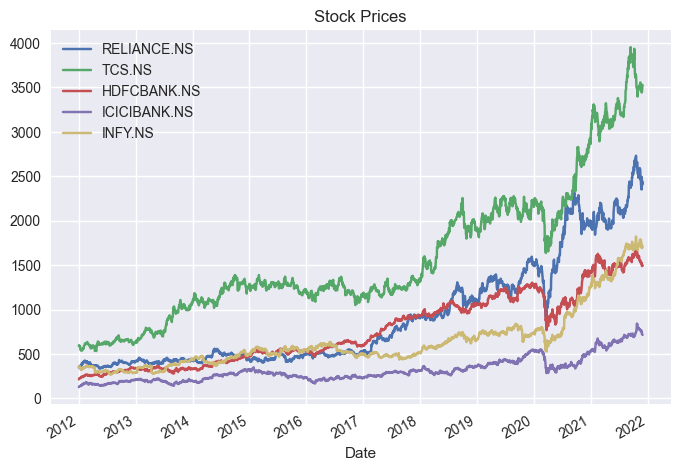

In [5]:
port_close.loc[:,['RELIANCE.NS','TCS.NS','HDFCBANK.NS','ICICIBANK.NS','INFY.NS']].plot()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.show()

The overall trend for all the stocks is increasing, with TCS & Reliance having major spikes post Covid. 

In [6]:
port_close.corr()

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS,^NSEI
HDFCBANK.NS,1.000000,0.909814,0.862774,0.925671,0.937450,0.968574
ICICIBANK.NS,0.909814,1.000000,0.925066,0.900245,0.942306,0.950119
INFY.NS,0.862774,0.925066,1.000000,0.913469,0.962685,0.920940
RELIANCE.NS,0.925671,0.900245,0.913469,1.000000,0.948676,0.910185
TCS.NS,0.937450,0.942306,0.962685,0.948676,1.000000,0.959178
^NSEI,0.968574,0.950119,0.920940,0.910185,0.959178,1.000000


Here, we can see that the stocks have a very strong correlation with both each other and the market index( Nifty50)

### Calculating Return : Using Percentage Change

In [7]:
returns = port_close.pct_change()
returns.dropna(inplace=True)
returns

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS,^NSEI
Date,,,,,,
2012-01-04,0.009450,0.023836,-0.003456,-0.011730,-0.020541,-0.003284
2012-01-05,0.000790,0.006729,-0.004992,-0.023249,-0.000853,0.000063
2012-01-06,0.021751,0.004812,-0.002817,0.025804,-0.002218,0.000874
2012-01-09,0.005295,-0.005188,0.001554,-0.015748,0.001667,-0.002377
2012-01-10,0.008778,0.035705,0.009536,0.042407,-0.005080,0.022508
...,...,...,...,...,...,...
2021-11-24,0.001650,0.011106,-0.023548,-0.014439,-0.006047,-0.005045
2021-11-25,0.005204,-0.012036,0.015566,0.060198,0.000755,0.006959
2021-11-26,-0.023625,-0.038413,-0.017853,-0.032231,0.000276,-0.029071


Once we calculate the return first row becomes `nan` as return for the first entry cannot be computed. Hence we drop that value.

In [8]:
returns.describe().T

,count,mean,std,min,25%,50%,75%,max
HDFCBANK.NS,2440.0,0.000893,0.014647,-0.126069,-0.006761,0.000484,0.007976,0.115996
ICICIBANK.NS,2440.0,0.000925,0.021618,-0.178478,-0.010891,0.000020,0.011716,0.146877
INFY.NS,2440.0,0.000801,0.017746,-0.212586,-0.007371,0.000687,0.009652,0.167851
RELIANCE.NS,2440.0,0.000941,0.017962,-0.131539,-0.009174,0.000517,0.010570,0.147180
TCS.NS,2440.0,0.000851,0.015750,-0.094103,-0.007477,0.000668,0.009011,0.122105
^NSEI,2440.0,0.000579,0.010706,-0.129805,-0.004500,0.000701,0.006150,0.087632


1. Negative excess returns indicate that the investment is performing worse than the benchmark(NIFTY50). 

### Importing CSV with FAMA French Factors

link - https://faculty.iima.ac.in/~iffm/Indian-Fama-French-Momentum/

In [9]:
import pandas as pd
df = pd.read_csv(r'/Users/kratikaaggarwal/Downloads/2022-03_FourFactors_and_Market_Returns_Daily_SurvivorshipBiasAdjusted.csv')
print(df)

            Date       SMB       HML       WML        MF        RF
0     1993-10-01  1.557011  1.242265 -0.439199       NaN       NaN
1     1993-10-04  0.441723  0.342366 -0.604401 -0.943991  0.022014
2     1993-10-05  0.020237  0.882847 -0.839673 -0.297380  0.022014
3     1993-10-06 -0.058198 -1.644238  0.152324 -0.324258  0.022014
4     1993-10-07 -0.305982  0.227731 -0.055639  0.396895  0.022014
...          ...       ...       ...       ...       ...       ...
7068  2022-03-25  0.087792 -0.035763  0.914173 -0.307918  0.010209
7069  2022-03-28 -0.888770 -0.045665  0.179171  0.032264  0.030631
7070  2022-03-29  0.383918 -1.480737 -0.505562  0.519493  0.010209
7071  2022-03-30  1.554316 -1.212277 -0.074146  0.558524  0.010209
7072  2022-03-31 -0.047029  0.377510 -0.032123  0.118689  0.010317

[7073 rows x 6 columns]



1. SMB - Small Minus Big (Historic excess returns of small-cap companies over large-cap companies.)
2. HML - High Minus Low (Historic excess returns of value stocks over growth stocks)
3. MF - Total Market Returns ( This data had for BSE, so instead of using this we added for NIFTY50)
4. RF - Risk Free Rate

#### Converting into appropriate Datetime datatype and then setting index

In [10]:
df['Datetime'] = pd.to_datetime(df['Date'])
df = df.set_index(['Datetime'])
del df['Date']
df

,SMB,HML,WML,MF,RF
Datetime,,,,,
1993-10-01,1.557011,1.242265,-0.439199,NaN,NaN
1993-10-04,0.441723,0.342366,-0.604401,-0.943991,0.022014
1993-10-05,0.020237,0.882847,-0.839673,-0.297380,0.022014
1993-10-06,-0.058198,-1.644238,0.152324,-0.324258,0.022014
1993-10-07,-0.305982,0.227731,-0.055639,0.396895,0.022014
...,...,...,...,...,...
2022-03-25,0.087792,-0.035763,0.914173,-0.307918,0.010209
2022-03-28,-0.888770,-0.045665,0.179171,0.032264,0.030631
2022-03-29,0.383918,-1.480737,-0.505562,0.519493,0.010209


In [11]:
df=df[df.index.year.isin(range(2012,2022))]

In [12]:
df

,SMB,HML,WML,MF,RF
Datetime,,,,,
2012-01-02,0.155622,0.812248,0.291455,-0.166654,0.066863
2012-01-03,-0.171824,0.810439,-3.536847,2.623072,0.022283
2012-01-04,-0.230901,0.356510,-3.009292,0.226935,0.022283
2012-01-05,0.363531,0.295083,-0.547696,-0.151992,0.022283
2012-01-06,-0.153447,0.503555,-1.122855,-0.031118,0.022389
...,...,...,...,...,...
2021-12-27,0.442537,-0.138670,0.401773,0.336824,0.029864
2021-12-28,0.618713,1.123667,0.558087,1.116567,0.009954
2021-12-29,1.037100,-0.527629,-0.289997,0.059762,0.009954


In [13]:
for i in returns.columns:
    returns[f'excess_return_{i}'] = returns[i] - df['RF']

In [14]:
c_df = returns.join(df)
c_df

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS,^NSEI,excess_return_HDFCBANK.NS,excess_return_ICICIBANK.NS,excess_return_INFY.NS,excess_return_RELIANCE.NS,excess_return_TCS.NS,excess_return_^NSEI,SMB,HML,WML,MF,RF
Date,,,,,,,,,,,,,,,,,
2012-01-04,0.009450,0.023836,-0.003456,-0.011730,-0.020541,-0.003284,-0.012833,0.001553,-0.025739,-0.034013,-0.042824,-0.025567,-0.230901,0.356510,-3.009292,0.226935,0.022283
2012-01-05,0.000790,0.006729,-0.004992,-0.023249,-0.000853,0.000063,-0.021493,-0.015554,-0.027275,-0.045532,-0.023135,-0.022220,0.363531,0.295083,-0.547696,-0.151992,0.022283
2012-01-06,0.021751,0.004812,-0.002817,0.025804,-0.002218,0.000874,-0.000637,-0.017576,-0.025205,0.003416,-0.024607,-0.021515,-0.153447,0.503555,-1.122855,-0.031118,0.022389
2012-01-09,0.005295,-0.005188,0.001554,-0.015748,0.001667,-0.002377,-0.039488,-0.049970,-0.043229,-0.060530,-0.043115,-0.047159,0.825155,0.643023,-2.607473,0.316147,0.044782
2012-01-10,0.008778,0.035705,0.009536,0.042407,-0.005080,0.022508,-0.013611,0.013316,-0.012852,0.020019,-0.027468,0.000119,0.200981,1.251512,-2.359033,1.832401,0.022389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,0.001650,0.011106,-0.023548,-0.014439,-0.006047,-0.005045,-0.007828,0.001628,-0.033025,-0.023917,-0.015525,-0.014522,0.525582,1.851334,0.591769,-0.422061,0.009478
2021-11-25,0.005204,-0.012036,0.015566,0.060198,0.000755,0.006959,-0.004294,-0.021535,0.006068,0.050700,-0.008743,-0.002539,0.620250,-0.270830,0.326853,1.010703,0.009498
2021-11-26,-0.023625,-0.038413,-0.017853,-0.032231,0.000276,-0.029071,-0.033123,-0.047911,-0.027351,-0.041729,-0.009223,-0.038570,1.083319,-0.776310,-1.259804,-2.581580,0.009498


### Check for Multicollinearity

Multicollinearity is a problem when two or more independent variables turn out to have a
high pairwise correlation. If two or more independent variables have a high correlation
among them, they use similar information when trying to predict the model, usually leading
to smaller coefficients and increased standard errors (Woodridge, 2015). If two variables
show a correlation higher than 0.8 or smaller than -0.8 in a correlation matrix, it should
definitely be considered that a multicollinearity problem exists.

In [15]:
c_df.loc[:,['SMB','HML','excess_return_^NSEI']].corr()

,SMB,HML,excess_return_^NSEI
SMB,1.000000,-0.153297,-0.133050
HML,-0.153297,1.000000,0.163187
excess_return_^NSEI,-0.133050,0.163187,1.000000


As we can see, this data is free from multicollinearity.

In [16]:
c_df=c_df.drop(['MF','WML'], axis=1)
c_df=c_df.dropna()
c_df

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS,^NSEI,excess_return_HDFCBANK.NS,excess_return_ICICIBANK.NS,excess_return_INFY.NS,excess_return_RELIANCE.NS,excess_return_TCS.NS,excess_return_^NSEI,SMB,HML,RF
Date,,,,,,,,,,,,,,,
2012-01-04,0.009450,0.023836,-0.003456,-0.011730,-0.020541,-0.003284,-0.012833,0.001553,-0.025739,-0.034013,-0.042824,-0.025567,-0.230901,0.356510,0.022283
2012-01-05,0.000790,0.006729,-0.004992,-0.023249,-0.000853,0.000063,-0.021493,-0.015554,-0.027275,-0.045532,-0.023135,-0.022220,0.363531,0.295083,0.022283
2012-01-06,0.021751,0.004812,-0.002817,0.025804,-0.002218,0.000874,-0.000637,-0.017576,-0.025205,0.003416,-0.024607,-0.021515,-0.153447,0.503555,0.022389
2012-01-09,0.005295,-0.005188,0.001554,-0.015748,0.001667,-0.002377,-0.039488,-0.049970,-0.043229,-0.060530,-0.043115,-0.047159,0.825155,0.643023,0.044782
2012-01-10,0.008778,0.035705,0.009536,0.042407,-0.005080,0.022508,-0.013611,0.013316,-0.012852,0.020019,-0.027468,0.000119,0.200981,1.251512,0.022389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,0.001650,0.011106,-0.023548,-0.014439,-0.006047,-0.005045,-0.007828,0.001628,-0.033025,-0.023917,-0.015525,-0.014522,0.525582,1.851334,0.009478
2021-11-25,0.005204,-0.012036,0.015566,0.060198,0.000755,0.006959,-0.004294,-0.021535,0.006068,0.050700,-0.008743,-0.002539,0.620250,-0.270830,0.009498
2021-11-26,-0.023625,-0.038413,-0.017853,-0.032231,0.000276,-0.029071,-0.033123,-0.047911,-0.027351,-0.041729,-0.009223,-0.038570,1.083319,-0.776310,0.009498


In [17]:
c_df.isnull().sum()

HDFCBANK.NS                   0
ICICIBANK.NS                  0
INFY.NS                       0
RELIANCE.NS                   0
TCS.NS                        0
^NSEI                         0
excess_return_HDFCBANK.NS     0
excess_return_ICICIBANK.NS    0
excess_return_INFY.NS         0
excess_return_RELIANCE.NS     0
excess_return_TCS.NS          0
excess_return_^NSEI           0
SMB                           0
HML                           0
RF                            0
dtype: int64

### CAPM

CAPM is also a tool for investor to understand whether an asset is fairly priced.

In [18]:
y_HDFCBANK_NS = c_df['excess_return_HDFCBANK.NS']
X = c_df['excess_return_^NSEI']
X = sm.add_constant(X, prepend=False)
capm_HDFCBANK_NS = sm.OLS(y_HDFCBANK_NS, X)
capm_result_HDFCBANK_NS = capm_HDFCBANK_NS.fit()
capm_result_HDFCBANK_NS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     excess_return_HDFCBANK.NS   R-squared:                       0.817
Model:                                   OLS   Adj. R-squared:                  0.817
Method:                        Least Squares   F-statistic:                 1.090e+04
Date:                       Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                               14:59:10   Log-Likelihood:                 7798.0
No. Observations:                       2438   AIC:                        -1.559e+04
Df Residuals:                           2436   BIC:                        -1.558e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_return_^NSEI     1.0055      0.010    104.425      0.000       0.987       1.024
const                   0.0005      0.000      1.440      0.150      -0.000       0.001
==============================================================================
Omnibus:                      183.094   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.161
Skew:                           0.053   Prob(JB):                    7.90e-212
Kurtosis:                       6.092   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. As P>|t| is 0.000. Hence, we reject Null hypothesis implying that there is a statistically significant relationship between excess return of NIFTY50 and HDFCBANK.
2. Excess Return of NIFTY50 Index accounts for 81.7% of the changes in the stock(HDFCBANK).

In [19]:
y_ICICIBANK_NS = c_df['excess_return_ICICIBANK.NS']
X = c_df['excess_return_^NSEI']
X = sm.add_constant(X, prepend=False)
capm_ICICIBANK_NS = sm.OLS(y_ICICIBANK_NS, X)
capm_result_ICICIBANK_NS = capm_ICICIBANK_NS.fit()
capm_result_ICICIBANK_NS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     excess_return_ICICIBANK.NS   R-squared:                       0.706
Model:                                    OLS   Adj. R-squared:                  0.706
Method:                         Least Squares   F-statistic:                     5843.
Date:                        Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                                14:59:10   Log-Likelihood:                 6743.2
No. Observations:                        2438   AIC:                        -1.348e+04
Df Residuals:                            2436   BIC:                        -1.347e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_return_^NSEI     1.1345      0.015     76.440      0.000       1.105       1.164
const                   0.0037      0.000      7.705      0.000       0.003       0.005
==============================================================================
Omnibus:                      595.955   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4072.339
Skew:                           0.976   Prob(JB):                         0.00
Kurtosis:                       9.023   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. As P>|t| is 0.000. Hence, we reject Null hypothesis implying that there is a statistically significant relationship between excess return of NIFTY50 and ICICIBANK.
2. Excess Return of NIFTY50 Index accounts for 70.6% of the changes in the stock(ICICIBANK).

In [20]:
y_INFY_NS = c_df['excess_return_INFY.NS']
X = c_df['excess_return_^NSEI']
X = sm.add_constant(X, prepend=False)
capm_INFY_NS = sm.OLS(y_INFY_NS, X)
capm_result_INFY_NS = capm_INFY_NS.fit()
capm_result_INFY_NS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     excess_return_INFY.NS   R-squared:                       0.581
Model:                               OLS   Adj. R-squared:                  0.581
Method:                    Least Squares   F-statistic:                     3374.
Date:                   Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                           14:59:10   Log-Likelihood:                 6570.4
No. Observations:                   2438   AIC:                        -1.314e+04
Df Residuals:                       2436   BIC:                        -1.313e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_return_^NSEI     0.9254      0.016     58.084      0.000       0.894       0.957
const                  -0.0017      0.001     -3.187      0.001      -0.003      -0.001
==============================================================================
Omnibus:                      789.152   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52560.191
Skew:                          -0.656   Prob(JB):                         0.00
Kurtosis:                      25.709   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. As P>|t| is 0.000. Hence, we reject Null hypothesis implying that there is a statistically significant relationship between excess return of NIFTY50 and INFOSYS.
2. Excess Return of NIFTY50 Index accounts for 58.1% of the changes in the stock(INFOSYS).

In [21]:
y_RELIANCE_NS = c_df['excess_return_RELIANCE.NS']
X = c_df['excess_return_^NSEI']
X = sm.add_constant(X, prepend=False)
capm_RELIANCE_NS = sm.OLS(y_RELIANCE_NS, X)
capm_result_RELIANCE_NS = capm_RELIANCE_NS.fit()
capm_result_RELIANCE_NS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     excess_return_RELIANCE.NS   R-squared:                       0.710
Model:                                   OLS   Adj. R-squared:                  0.710
Method:                        Least Squares   F-statistic:                     5977.
Date:                       Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                               14:59:10   Log-Likelihood:                 6999.4
No. Observations:                       2438   AIC:                        -1.399e+04
Df Residuals:                           2436   BIC:                        -1.398e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_return_^NSEI     1.0329      0.013     77.310      0.000       1.007       1.059
const                   0.0012      0.000      2.731      0.006       0.000       0.002
==============================================================================
Omnibus:                      498.065   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4117.238
Skew:                           0.729   Prob(JB):                         0.00
Kurtosis:                       9.197   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. As P>|t| is 0.000. Hence, we reject Null hypothesis implying that there is a statistically significant relationship between excess return of NIFTY50 and RELIANCE.
2. Excess Return of NIFTY50 Index accounts for 71.0% of the changes in the stock(RELIANCE).

In [22]:
y_TCS_NS = c_df['excess_return_TCS.NS']
X = c_df['excess_return_^NSEI']
X = sm.add_constant(X, prepend=False)
capm_TCS_NS = sm.OLS(y_TCS_NS, X)
capm_result_TCS_NS = capm_TCS_NS.fit()
capm_result_TCS_NS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     excess_return_TCS.NS   R-squared:                       0.602
Model:                              OLS   Adj. R-squared:                  0.602
Method:                   Least Squares   F-statistic:                     3682.
Date:                  Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                          14:59:10   Log-Likelihood:                 6790.0
No. Observations:                  2438   AIC:                        -1.358e+04
Df Residuals:                      2436   BIC:                        -1.356e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_return_^NSEI     0.8834      0.015     60.678      0.000       0.855       0.912
const                  -0.0027      0.000     -5.605      0.000      -0.004      -0.002
==============================================================================
Omnibus:                      218.895   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.337
Skew:                           0.113   Prob(JB):                    9.14e-302
Kurtosis:                       6.687   Cond. No.                         48.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. As P>|t| is 0.000. Hence, we reject Null hypothesis implying that there is a statistically significant relationship between excess return of NIFTY50 and TCS.
2. Excess Return of NIFTY50 Index accounts for 60.2% of the changes in the stock(TCS).

In [23]:
betas = [capm_result_RELIANCE_NS.params[0],
         capm_result_TCS_NS.params[0],
         capm_result_HDFCBANK_NS.params[0],
         capm_result_ICICIBANK_NS.params[0],
         capm_result_INFY_NS.params[0]
        ]
betas

[1.0329212346453993,
 0.8834085976545701,
 1.0054813190264218,
 1.1344584473976993,
 0.9253654919683613]

### Security Market Line

In [24]:
def SML(rf, ret, beta):
    asset_ret = [rf + (rm - rf) * i for i in betas]
    print(asset_ret)
    plt.plot(betas, asset_ret)
    plt.xlabel('Asset Beta')
    plt.ylabel('Asset Return')
    plt.title('SML')
    plt.plot(1, ret, 'ro')

In [25]:
rf = c_df['RF'].mean()
rm = c_df['^NSEI'].mean()

[-0.0002506285156984277, 0.0035178672636543007, 0.00044100002003701413, -0.002809894176485035, 0.002460335389970817]


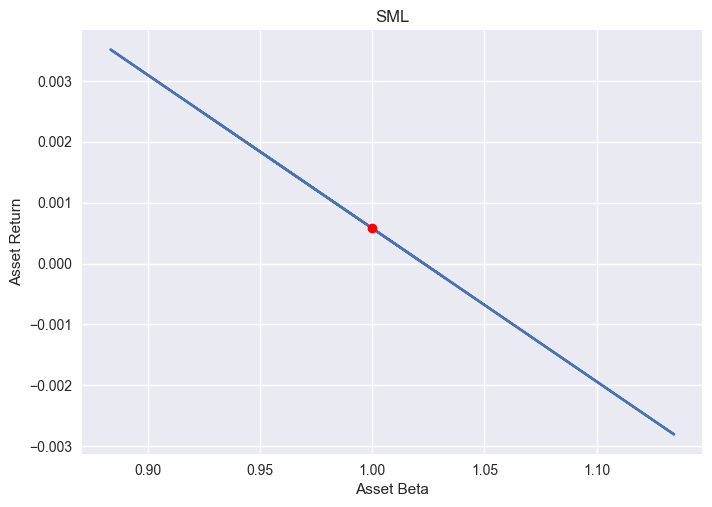

In [26]:
SML(rf, rm,betas)

When assets have a low market supply and a high market beta, then the slope of SML is downwards.

In [27]:
ret_exp = [-0.0002506285156984277, 0.0035178672636543007, 0.00044100002003701413, -0.002809894176485035, 0.002460335389970817]

In [28]:
df_ret_exp = pd.DataFrame(ret_exp)
df_betas = pd.DataFrame(betas)
df_all1 = pd.concat([df_betas, df_ret_exp], axis=1)
df_all1.columns = ['beta_1', 'Expected_Return']
df_all1.index = returns.columns[:5]
df_all1

,beta_1,Expected_Return
HDFCBANK.NS,1.032921,-0.000251
ICICIBANK.NS,0.883409,0.003518
INFY.NS,1.005481,0.000441
RELIANCE.NS,1.134458,-0.002810
TCS.NS,0.925365,0.002460


* If the $\beta$>1, stock is riskier than the benchmark market
* If the $\beta$=1, stock is as risky as the benchmark market
* If the $\beta$<1, stock is less risky than the benchmark market

Interpretation:
1. HDFCBANK, INFY, RELIANCE - Riskier than the benchmark market - Aggressive Securities
2. ICICIBANK, TCS - less risky than the benchmark market - Defensive Securities

According to SML, a higher beta should indicate higher market returns. However in the scenario for Indian Markets, our beta value for three stocks was above market beta of 1. And yet as a group these stock haves seem to have underperformed suggesting that higher beta actually leads to lower returns and vice versa. 

In [29]:
def over_under_val(rf, rm, stock):
    x = rf + (rm - rf) * df_all1['beta_1'].loc[stock]# required rate of return(equilibrium)
    y = df_all1['Expected_Return'].loc[stock] # expectations
    if x < y:
        print('The stock is underpriced')
    elif x > y:
        print('The stock is overpriced')
    else:
        print('The stock is fairly priced')    


In [30]:
over_under_val(rf, rm, 'RELIANCE.NS')

The stock is fairly priced


In [31]:
over_under_val(rf, rm, 'TCS.NS')

The stock is fairly priced


In [32]:
over_under_val(rf, rm, 'HDFCBANK.NS')

The stock is fairly priced


In [33]:
over_under_val(rf, rm, 'ICICIBANK.NS')

The stock is fairly priced


In [34]:
over_under_val(rf, rm, 'INFY.NS')

The stock is fairly priced


### Evaluating Risk to Return Relationship: Sharpe Ratio


Assuming that the portfolio is not well-diversified:

In this case, total risk matters and Sharpe ratio consider the total risk. 
Sharpe ratio is:

\begin{equation}Sharpe=\frac{r_i-r_f}{\sigma_i}\end{equation}

where $r_i$ and $\sigma_i$ denote return and standard deviation of the stock, respectively.

In [35]:
def sharpe(stocks, rf, n_assets):
    sharpe_ratios = {}
    for i, j in zip(stocks, range(n_assets)):
        sharpe_ratios[i] = (returns.iloc[:,j].mean()-rf)/np.std(returns.iloc[:,j])
    return sharpe_ratios

In [36]:
stocks = returns.columns[:5]
sharpe_ratios = sharpe(stocks, rf, 5)
sharpe_ratios

{'HDFCBANK.NS': -1.69969245276693,
 'ICICIBANK.NS': -1.1501863313677276,
 'INFY.NS': -1.4081376086586388,
 'RELIANCE.NS': -1.3834142148368758,
 'TCS.NS': -1.5833535055012091}

A negative Sharpe ratio means the risk-free or benchmark rate is greater than the portfolio's historical or projected return, or else the portfolio's return is expected to be negative.

###  Evaluating Risk to Return Relationship: Treynor Ratio

The second scenario is if portfolio is well-diversified

This is an ideal situation for Treynor ratio, because Treynor ratio takes systematic risk into account to assess the risk-reward situation of an asset or a portfolio.

\begin{equation}\text{Treynor ratio}=\frac{r_i-r_f}{\beta_i}\end{equation}

In [37]:
def treynor(stocks, rf, n_assets):
    treynor_ratios = {}
    for i, j in enumerate(stocks):
        treynor_ratios[j] = (returns.iloc[:, i].mean() - rf) / df_all1['beta_1'][j]
    return treynor_ratios

In [38]:
treynor_ratios = treynor(stocks, rf, 4)
treynor_ratios

{'HDFCBANK.NS': -0.024097747992299547,
 'ICICIBANK.NS': -0.028139963900372215,
 'INFY.NS': -0.024847222445338008,
 'RELIANCE.NS': -0.021899162315868567,
 'TCS.NS': -0.02694418477130057}

A negative ratio indicates that the investment has performed worse than a risk free instrument.

### Fama French 3 Factor Model

The Fama-French Three Factor model is a formula for calculating the rate of return on a given asset. Like many (if not most) such models, it offers an estimated value based on market factors at large. In this case, investors can predict their return on investment based on overall market risk, market size and market value.

In [39]:
X = c_df[['excess_return_^NSEI', 'SMB', 'HML']]
y = c_df['excess_return_RELIANCE.NS']
X = sm.add_constant(X)
ff_model_RELIANCE_NS = sm.OLS(y, X).fit()
print(ff_model_RELIANCE_NS.summary())
intercept, b1, b2, b3 = ff_model_RELIANCE_NS.params

                                OLS Regression Results                               
Dep. Variable:     excess_return_RELIANCE.NS   R-squared:                       0.719
Model:                                   OLS   Adj. R-squared:                  0.719
Method:                        Least Squares   F-statistic:                     2078.
Date:                       Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                               14:59:10   Log-Likelihood:                 7036.8
No. Observations:                       2438   AIC:                        -1.407e+04
Df Residuals:                           2434   BIC:                        -1.404e+04
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

1. Beta1 & Beta2 are significant, considering a significance level of 0.05. 
2. Excess Return of NIFTY50 Index accounts for 71.9% of the changes in the stock(RELIANCE).

In [40]:
X = c_df[['excess_return_^NSEI', 'SMB', 'HML']]
y = c_df['excess_return_TCS.NS']
X = sm.add_constant(X)
ff_model_TCS_NS = sm.OLS(y, X).fit()
print(ff_model_TCS_NS.summary())
intercept, b1, b2, b3 = ff_model_TCS_NS.params

                             OLS Regression Results                             
Dep. Variable:     excess_return_TCS.NS   R-squared:                       0.644
Model:                              OLS   Adj. R-squared:                  0.643
Method:                   Least Squares   F-statistic:                     1467.
Date:                  Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                          14:59:10   Log-Likelihood:                 6926.1
No. Observations:                  2438   AIC:                        -1.384e+04
Df Residuals:                      2434   BIC:                        -1.382e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

1. Beta1, Beta2 & Beta3 are significant, considering a significance level of 0.05.
2. Excess Return of NIFTY50 accounts for 64.4% of the changes in the stock(TCS).

In [41]:
X = c_df[['excess_return_^NSEI', 'SMB', 'HML']]
y = c_df['excess_return_HDFCBANK.NS']
X = sm.add_constant(X)
ff_model_HDFCBANK_NS = sm.OLS(y, X).fit()
print(ff_model_HDFCBANK_NS.summary())
intercept, b1, b2, b3 = ff_model_HDFCBANK_NS.params

                                OLS Regression Results                               
Dep. Variable:     excess_return_HDFCBANK.NS   R-squared:                       0.820
Model:                                   OLS   Adj. R-squared:                  0.819
Method:                        Least Squares   F-statistic:                     3685.
Date:                       Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                               14:59:10   Log-Likelihood:                 7812.4
No. Observations:                       2438   AIC:                        -1.562e+04
Df Residuals:                           2434   BIC:                        -1.559e+04
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

1. Beta1 & Beta3 are significant, considering a significance level of 0.05.
2. Excess Return of NIFTY50 Index accounts for 82.0% of the changes in the stock(HDFCBANK).

In [42]:
X = c_df[['excess_return_^NSEI', 'SMB', 'HML']]
y = c_df['excess_return_ICICIBANK.NS']
X = sm.add_constant(X)
ff_model_ICICIBANK_NS = sm.OLS(y, X).fit()
print(ff_model_ICICIBANK_NS.summary())
intercept, b1, b2, b3 = ff_model_ICICIBANK_NS.params

                                OLS Regression Results                                
Dep. Variable:     excess_return_ICICIBANK.NS   R-squared:                       0.713
Model:                                    OLS   Adj. R-squared:                  0.713
Method:                         Least Squares   F-statistic:                     2018.
Date:                        Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                                14:59:10   Log-Likelihood:                 6774.7
No. Observations:                        2438   AIC:                        -1.354e+04
Df Residuals:                            2434   BIC:                        -1.352e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

1. Beta1 & Beta3 are significant, considering a significance level of 0.05.
2. Excess Return of NIFTY50 Index accounts for 71.3% of the changes in the stock(ICICIBANK).

In [43]:
X = c_df[['excess_return_^NSEI', 'SMB', 'HML']]
y = c_df['excess_return_INFY.NS']
X = sm.add_constant(X)
ff_model_INFY_NS = sm.OLS(y, X).fit()
print(ff_model_INFY_NS.summary())
intercept, b1, b2, b3 = ff_model_INFY_NS.params

                              OLS Regression Results                             
Dep. Variable:     excess_return_INFY.NS   R-squared:                       0.606
Model:                               OLS   Adj. R-squared:                  0.606
Method:                    Least Squares   F-statistic:                     1249.
Date:                   Mon, 31 Oct 2022   Prob (F-statistic):               0.00
Time:                           14:59:10   Log-Likelihood:                 6647.1
No. Observations:                   2438   AIC:                        -1.329e+04
Df Residuals:                       2434   BIC:                        -1.326e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

1. Beta1, Beta2 & Beta3 are significant, considering a significance level of 0.05.
2. Excess Return of NIFTY50 Index accounts for 60.6% of the changes in the stock(INFOSYS).

In [44]:
ff_model_INFY_NS.params[1]

0.9520972293811805

In [45]:
betas_ffm = [ff_model_RELIANCE_NS.params[1],
         ff_model_TCS_NS.params[1],
         ff_model_HDFCBANK_NS.params[1],
         ff_model_ICICIBANK_NS.params[1],
         ff_model_INFY_NS.params[1]
        ]
betas_ffm

[1.0166377873723307,
 0.9125401358978839,
 1.0147442231238615,
 1.1195043469502297,
 0.9520972293811805]

In [46]:
smbs = [ff_model_RELIANCE_NS.params[2],
         ff_model_TCS_NS.params[2],
         ff_model_HDFCBANK_NS.params[2],
         ff_model_ICICIBANK_NS.params[2],
         ff_model_INFY_NS.params[2]
        ]
smbs

[-0.0031028851400963196,
 -0.0018965374055697956,
 0.00020647443119799154,
 0.0008906671496049101,
 -0.001135906220524028]

In [47]:
hmls = [ff_model_RELIANCE_NS.params[3],
         ff_model_TCS_NS.params[3],
         ff_model_HDFCBANK_NS.params[3],
         ff_model_ICICIBANK_NS.params[3],
         ff_model_INFY_NS.params[3]
        ]
hmls

[0.00014020052066116226,
 -0.005220665361042932,
 -0.001119817425234584,
 0.0026246177725628003,
 -0.004387281836308795]

In [48]:
smb = c_df['SMB'].mean()
hml = c_df['HML'].mean()

In [49]:
def FFF(rf, ret, beta , smbs ,smb, hmls,hml):
    a = [(rm - rf) * i for i in betas]
    #print(a)
    b = [smb *j for j in smbs]
    #print(b)
    c = [hml * k for k in hmls]
    #print(c)
    asset_ret=[]
    for x in range(5):
        asset_ret.append(rf + a[x] + b[x] + c[x] )
    print(asset_ret)

In [50]:
FFF(rf, rm, betas_ffm , smbs ,smb, hmls,hml)

[-0.00022469513495117953, 0.003396161067869162, 0.00041048707512073457, -0.0027482568102461507, 0.002354766765715996]


In [51]:
ret_exp_fff=[0.0001857323951688045, 0.0026618948471301474, 0.00017701373334634313, -0.0023713357315030704, 0.001680988002646264]
ret_exp_fff

[0.0001857323951688045,
 0.0026618948471301474,
 0.00017701373334634313,
 -0.0023713357315030704,
 0.001680988002646264]

In [52]:
df_ret_exp = pd.DataFrame(ret_exp_fff)
df_betas = pd.DataFrame(betas_ffm)
df_smbs = pd.DataFrame(smbs)
df_hmls = pd.DataFrame(hmls)
df_all = pd.concat([df_betas,df_smbs,df_hmls, df_ret_exp], axis=1)
df_all.columns = ['beta_1', 'beta_2','beta_3', 'Expected_Return']
df_all.index = returns.columns[:5]
df_all

,beta_1,beta_2,beta_3,Expected_Return
HDFCBANK.NS,1.016638,-0.003103,0.000140,0.000186
ICICIBANK.NS,0.912540,-0.001897,-0.005221,0.002662
INFY.NS,1.014744,0.000206,-0.001120,0.000177
RELIANCE.NS,1.119504,0.000891,0.002625,-0.002371
TCS.NS,0.952097,-0.001136,-0.004387,0.001681


In [53]:
df_all.corr()

,beta_1,beta_2,beta_3,Expected_Return
beta_1,1.000000,0.583522,0.973684,-0.999895
beta_2,0.583522,1.000000,0.410820,-0.594387
beta_3,0.973684,0.410820,1.000000,-0.970341
Expected_Return,-0.999895,-0.594387,-0.970341,1.000000


Conclusions : 
    
    In CAPM:
    1. Beta is significant in 5/5 cases.

    In Fama French 3 Factor Model:
    1. Beta1 is significant in 5/5 cases. 
    2. Beta2 is significant in 3/5 cases.
    3. Beta3 is significant in 4/5 cases. 

References : 
1. Agarwalla, S. K., Jacob, J. and Varma, J. R. (2013), Four factor model in Indian equities market, Working Paper W.P. No. 2013-09-05, Indian Institute of Management, Ahmedabad. URL: https://faculty.iima.ac.in/~iffm/Indian-Fama-French-Momentum/four-factors-India-90s-onwards-IIM-WP-Version.pdf
2. https://gupea.ub.gu.se/bitstream/handle/2077/67741/gupea_2077_67741_1.pdf?sequence=1&isAllowed=y
3. https://medium.com/mlearning-ai/the-capital-asset-pricing-model-capm-financial-analysis-in-python-1a7a4f2c7650
4. https://www.investopedia.com/ask/answers/022515/how-do-i-use-capm-capital-asset-pricing-model-determine-cost-equity.asp#:~:text=The%20capital%20asset%20pricing%20model%20(CAPM)%20is%20used%20to%20calculate,and%20the%20risk%2Dfree%20rate
5.https://www.investopedia.com/terms/f/famaandfrenchthreefactormodel.asp#:~:text=What%20Are%20the%20Three%20Factors,risk%2Dfree%20rate%20of%20return